## Question 1 — The DS Problem (0 points)

In your own words, formulate the Data Science problem.

**In this project, we want to identify the optimal lifestyle and social determinants of health that reduce the chance of getting diabetes.**

We will use the CDC Diabetes Health Indicators dataset to predict diabetic outcomes based on factors such as BMI, physical activity, age, gender, health history, income, and more. We will determine which features are most relevant to a diabetes diagnosis. We will then use machine learning algorithms to assess whether an individual is healthy, pre-diabetic, or diabetic (given these relevant features). These algorithms will take into account both behavioral characteristics as well as demographics in order to generate the most accurate predictions. The findings will help us understand which characteristics are most important for reducing the change of gettin diabetes and could lead to public health initiatives that aim to minimize diabetes risk. In addition, it could help determine which demographics are in most need of resources and preventative measuers to help them reduce their chances of getting diabetes.

## Question 2 — Prepare the Data (5 pts)

- Evaluate the dataset to determine if ALL variables are represented in their expected type. Convert variables to suitable data types for ML modeling. This means that you need to identify categorical data, discrete and continuous variables represent them accordingly.

- Analyze the data to determine what preprocessing steps are needed to ensure that the following are handled: 1) missing values, 2) invalid values, 3) outliers. Perform the required data preparation steps and justify the approach that is taken to prepare the data for analysis. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Load dataset
# file_path = '/Users/danielsobel/Desktop/Practicum 2/diabetes_012_health_indicators_BRFSS2015.csv'
# df = pd.read_csv(file_path)

In [3]:
# Load data and turn into a dataframe
df = pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')
print(df.shape)
pd.set_option('display.max_columns', None)
df.head()

(253680, 22)


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [4]:
# Display initial data types 
df.dtypes

Diabetes_012            float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

In [5]:
# Convert all columns to int
df = df.astype('int64')

# Convert categorical variables 
categorical_columns = ['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 
                       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 
                       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex']
df[categorical_columns] = df[categorical_columns].astype('category')

# Display data types after conversion
df.dtypes

Diabetes_012            category
HighBP                  category
HighChol                category
CholCheck               category
BMI                        int64
Smoker                  category
Stroke                  category
HeartDiseaseorAttack    category
PhysActivity            category
Fruits                  category
Veggies                 category
HvyAlcoholConsump       category
AnyHealthcare           category
NoDocbcCost             category
GenHlth                    int64
MentHlth                   int64
PhysHlth                   int64
DiffWalk                category
Sex                     category
Age                        int64
Education                  int64
Income                     int64
dtype: object

In [6]:
# Check for missing values
df.isnull().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [7]:
# Summary statistics
df.describe(include = "all")

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.0,253680.0,253680.0,253680.0,253680.000000,253680.0,253680.0,253680.0,253680.0,253680.0,253680.0,253680.0,253680.0,253680.0,253680.000000,253680.000000,253680.000000,253680.0,253680.0,253680.000000,253680.000000,253680.000000
unique,3.0,2.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN
top,0.0,0.0,0.0,1.0,NaN,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
freq,213703.0,144851.0,146089.0,244210.0,NaN,141257.0,243388.0,229787.0,191920.0,160898.0,205841.0,239424.0,241263.0,232326.0,NaN,NaN,NaN,211005.0,141974.0,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,28.382364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.511392,3.184772,4.242081,NaN,NaN,8.032119,5.050434,6.053875
std,NaN,NaN,NaN,NaN,6.608694,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.068477,7.412847,8.717951,NaN,NaN,3.054220,0.985774,2.071148
min,NaN,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000,NaN,NaN,1.000000,1.000000,1.000000
25%,NaN,NaN,NaN,NaN,24.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,0.000000,0.000000,NaN,NaN,6.000000,4.000000,5.000000
50%,NaN,NaN,NaN,NaN,27.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,0.000000,0.000000,NaN,NaN,8.000000,5.000000,7.000000
75%,NaN,NaN,NaN,NaN,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,2.000000,3.000000,NaN,NaN,10.000000,6.000000,8.000000


In [8]:
# Addressing outliers in BMI column
# https://careerfoundry.com/en/blog/data-analytics/how-to-find-outliers/

# BMI before
print("BMI before capping outliers:\n", df['BMI'].describe())

# Cap outliers at the 95th percentile 
percentile_95 = df['BMI'].quantile(0.95)
df['BMI'] = np.where(df['BMI'] > percentile_95, percentile_95, df['BMI'])

# BMI after capping
print("\nBMI after capping outliers:\n", df['BMI'].describe())


BMI before capping outliers:
 count    253680.000000
mean         28.382364
std           6.608694
min          12.000000
25%          24.000000
50%          27.000000
75%          31.000000
max          98.000000
Name: BMI, dtype: float64

BMI after capping outliers:
 count    253680.000000
mean         28.042565
std           5.413445
min          12.000000
25%          24.000000
50%          27.000000
75%          31.000000
max          40.000000
Name: BMI, dtype: float64


**Explanation:**

We first converted all columns to integers so continous variables aligned with the data type stated in the data dictionary and categorical varaibles would not have decimals. We then converted all categorical columns to type category. We chose which columns to convert based on the description of each variable in the data dictionary. We checked for missing values and found none, so we did not need to handle any missing values. We then looked at the summary statistics of the data set to look for inidactors of invalid data. There were no negative values. All values for each column fit within the valid values for that column. We saw that the max BMI was very far off from the mean, so we addressed that outlier by limiting the BMI column to the 95th percentile to lessen the impact of extreme values. With the method we used, any values above the 95th percentile would replaced with the value at the 95th percentile. This decreased the standard deviation and reduced the max BMI by nearly 60. 

## Question 3 — (35 points)

- Perform exploratory data analysis. Ensure that you analyze the relationships between the various features and social determinants of health in the dataset, and the diabetic outcomes. Create visualizations to demonstrate your findings and explain the results.

We already peerformed a good chunk of the EDA in the question above (looking at summary statistics, handling missing/invalid data, converting data types), so this is a continuation of our exploration.

In [9]:
# Remove for repeated rows
df = df[df.duplicated() == False]
df.shape

(229607, 22)

In [10]:
# separate the data into categorical columns and continuous discrete columns 
# categorical_columns is already instantiated 
continuous_discrete_columns = ['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']

In [11]:
# Looking at the mean values of each continuous features by each diabetes outcome
for col in continuous_discrete_columns:
    print(f"\nMean {col} by diabetes outcome:")
    print(df.groupby('Diabetes_012')[col].mean())
    
# Looking at the proportion analysis for each categorical features by each diabetes outcome
for col in categorical_columns:
    print(f"\nProportion of {col} by diabetes outcome:")
    print(df.groupby('Diabetes_012')[col].value_counts(normalize=True))


Mean BMI by diabetes outcome:
Diabetes_012
0    27.719088
1    30.203284
2    31.204578
Name: BMI, dtype: float64

Mean GenHlth by diabetes outcome:
Diabetes_012
0    2.463854
1    2.976021
2    3.296135
Name: GenHlth, dtype: float64

Mean MentHlth by diabetes outcome:
Diabetes_012
0    3.300533
1    4.531864
2    4.495325
Name: MentHlth, dtype: float64

Mean PhysHlth by diabetes outcome:
Diabetes_012
0    4.022159
1    6.351048
2    8.011031
Name: PhysHlth, dtype: float64

Mean Age by diabetes outcome:
Diabetes_012
0    7.825378
1    9.082091
2    9.376062
Name: Age, dtype: float64

Mean Education by diabetes outcome:
Diabetes_012
0    5.029390
1    4.783971
2    4.739525
Name: Education, dtype: float64

Mean Income by diabetes outcome:
Diabetes_012
0    6.030527
1    5.350832
2    5.195257
Name: Income, dtype: float64

Proportion of Diabetes_012 by diabetes outcome:
Diabetes_012
0               0.0
1               0.0
2               0.0
Name: proportion, dtype: float64

Proportion 

C:\Users\laure\AppData\Local\Temp\ipykernel_18712\2735863480.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('Diabetes_012')[col].mean())
C:\Users\laure\AppData\Local\Temp\ipykernel_18712\2735863480.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('Diabetes_012')[col].value_counts(normalize=True))
C:\Users\laure\AppData\Local\Temp\ipykernel_18712\2735863480.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default

Diabetes_012  HvyAlcoholConsump
0             0                    0.932015
              1                    0.067985
1             0                    0.955066
              1                    0.044934
2             0                    0.976284
              1                    0.023716
Name: proportion, dtype: float64

Proportion of AnyHealthcare by diabetes outcome:
Diabetes_012  AnyHealthcare
0             1                0.943574
              0                0.056426
1             1                0.945129
              0                0.054871
2             1                0.959466
              0                0.040534
Name: proportion, dtype: float64

Proportion of NoDocbcCost by diabetes outcome:
Diabetes_012  NoDocbcCost
0             0              0.910556
              1              0.089444
1             0              0.870598
              1              0.129402
2             0              0.893336
              1              0.106664
Name: proportion, 

C:\Users\laure\AppData\Local\Temp\ipykernel_18712\2735863480.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('Diabetes_012')[col].value_counts(normalize=True))
C:\Users\laure\AppData\Local\Temp\ipykernel_18712\2735863480.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('Diabetes_012')[col].value_counts(normalize=True))
C:\Users\laure\AppData\Local\Temp\ipykernel_18712\2735863480.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to ad

**Trends for feature by diabetes diagnosis (non-diabetic, pre-diabetic, or diabetic)**

BMI: mean BMI increases as the diabetic diagnosis progresses (from non-diabetic to prediabetic to diabetic)

GENHlth: mean GenHlth score worsens for each diabetic category (1 = best, 5 = worst)

MentHlth: mean # of days with poor mental health in the past month is lowest for those without diabetes, and higher for those with prediabetes and diabetes, the score for prediabetes and diabetes is roughly the same

PhysHlth: mean # of days with poor physical health in the past month increases by roughly 2 days for each group

Age: the age group is lowest for those without diabetes and roughly the same for pre-diabetics and diabetics

Education: those without diabetes have the highest average level of education while pre-diabetics and diabetics have slightly 
lower average levels of education

Income: those without diabetes have the highest average income level while pre-diabetics and diabetics have slightly lower average income level

HighBP: the proportion of those with high blood pressure is roughly the same for non-diabetics and pre-diabetics, but is highest for those with diabetes

HighChol: the proportion of those with high cholesterol is roughly the same for all groups but is slightly higher for for those with diabetes

CholCheck: the proportion of those who have checked their cholesterol in the past 5 years slightly increases as as the diabetic diagnosis progresses

Smoker: the proportion of those who are smokers slightly increases as as diabetic diagnosis progresses with the biggest jump being from non-diabetic to pre-diabetic

Stroke: the proportion of those who have ever had a stroke jumps from 3% to 6% to 9%, increasing as the diabetic diagnosis progresses

HeartDiseaseorAttack: the proportion of those who have coronary heart disease or a myocardial infarction jumps from 7% to 14% to 22% according to each diabetes diagnosis

PhysActivity: the proportion of those who have completed physical excersise in the past month decreases by 10% then by 4% with each level of diabetes diagnosis

Fruits: the proportion of those who consume fruit at some point in the day decreases slightly with each level of diabetes diagnosis

Veggies: the proportion of those who consume veggies at some point in the day decreases slightly with each level of diabetes, but more of a decrease than fruit

HvyAlcoholConsump: the proportion of heavy drinkers is low in each level of diagnosis and decreases with each increased level of diagnosis 

AnyHealthcare: the proportion of those with health care coverage is roughly the same for all groups, but slightly highest for those with diabetes

NoDocbcCost: the proportion of those who needed a doctor but could not see one due to the cost is highest for pre-diabetics, and lowest for  non-diabetics, all proportions are within a small range of one another

DiffWalk: the proportion of those with difficulty walking increases significantly with each level of diabetes diagnosis

Sex: the difference in proportion between men and women is roughly the same for each diabetic group

In [12]:
# calculate the patients in the data set that are in/active and non-diabetic, prediabetic, and diabetic
active_diabetic = df[(df["Diabetes_012"] == 2) & (df["PhysActivity"] == 1)].shape[0]
inactive_diabetic = df[(df["Diabetes_012"] == 2) & (df["PhysActivity"] == 0)].shape[0]
active_prediabetic = df[(df["Diabetes_012"] == 1) & (df["PhysActivity"] == 1)].shape[0]
inactive_prediabetic = df[(df["Diabetes_012"] == 1) & (df["PhysActivity"] == 0)].shape[0]
active_non_diabetic = df[(df["Diabetes_012"] == 0) & (df["PhysActivity"] == 1)].shape[0]
inactive_non_diabetic = df[(df["Diabetes_012"] == 0) & (df["PhysActivity"] == 0)].shape[0]

# calculate proportions
total_diabetic = active_diabetic + inactive_diabetic
total_prediabetic = active_prediabetic + inactive_prediabetic
total_non_diabetic = active_non_diabetic + inactive_non_diabetic
active_diabetic_prop = active_diabetic / total_diabetic
inactive_diabetic_prop = inactive_diabetic / total_diabetic
active_prediabetic_prop = active_prediabetic / total_prediabetic
inactive_prediabetic_prop = inactive_prediabetic / total_prediabetic
active_non_diabetic_prop = active_non_diabetic / total_non_diabetic
inactive_non_diabetic_prop = inactive_non_diabetic / total_non_diabetic

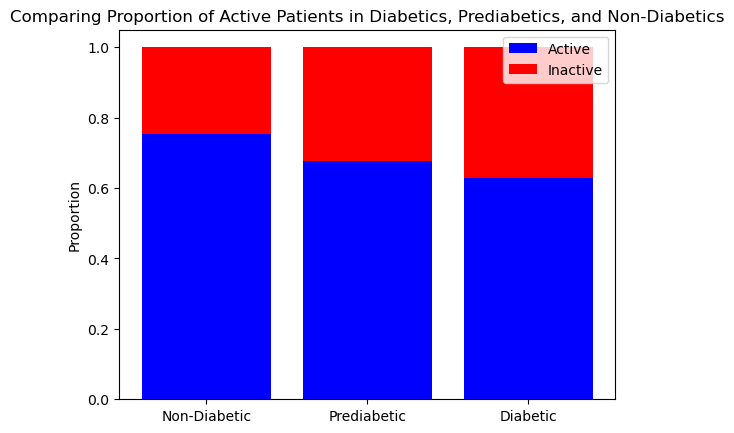

In [13]:
# plot bar chart comparing physical activity between those with and without diabetes
plt.bar("Non-Diabetic", active_non_diabetic_prop, color = "blue")
plt.bar("Non-Diabetic", inactive_non_diabetic_prop, color = "red", bottom = active_non_diabetic_prop)
plt.bar("Prediabetic", active_prediabetic_prop, color = "blue")
plt.bar("Prediabetic", inactive_prediabetic_prop, color = "red", bottom = active_prediabetic_prop)
plt.bar("Diabetic", active_diabetic_prop, color = "blue")
plt.bar("Diabetic", inactive_diabetic_prop, color = "red", bottom = active_diabetic_prop)
plt.ylabel("Proportion")
plt.title("Comparing Proportion of Active Patients in Diabetics, Prediabetics, and Non-Diabetics")
plt.legend(["Active", "Inactive"])
plt.show()

This bar chart compares the proportion of people who have completed physical activity apart from their job within the past 30 days between three groups: non-diabetics, prediabetics, and diabetics. We can see that the proportion of diabetics that are inactive is higher than that of non-diabetics. As the level of diabetic diagnosis becomes more serious, the proportion of inactive patients increases. This suggests a possible correlation between a lack of physical activity and diabetes. 

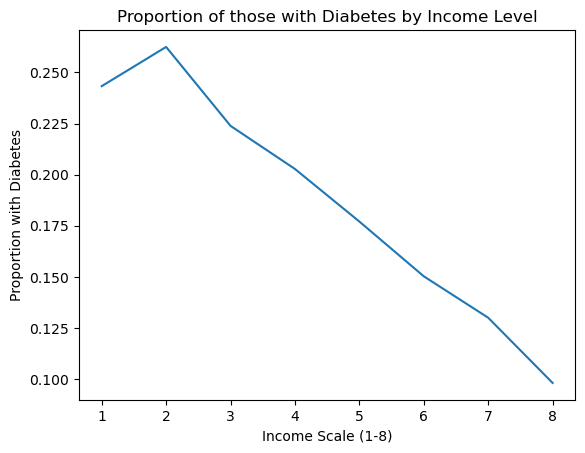

In [14]:
# Group by Income and calculate proportion with diabetes
proportion_diabetes_byincome = df[df["Diabetes_012"] == 2].groupby("Income").size() / df.groupby("Income").size()
plt.plot(proportion_diabetes_byincome.index, proportion_diabetes_byincome.values)
plt.title("Proportion of those with Diabetes by Income Level")
plt.xlabel("Income Scale (1-8)")
plt.ylabel("Proportion with Diabetes")
plt.show()

This chart tracks the proportion of people in the dataset with diabetes across multiple income levels. A lower number along the x axis indicates lower income levels, as 1 represents an income less than 10 thousand dollars while 8 represents an income of 75,000 dollars or more. This graph shows that the income level with the highest proportion of diabetes is level 2 while the level with the lowest proportion of diabetes is level 8. There appears to be a negative linear relationship between income and diabetes.

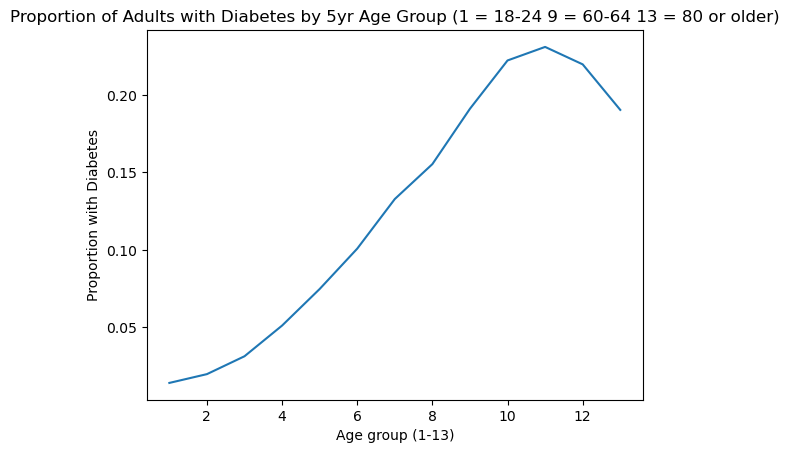

In [15]:
# Group by Income and calculate proportion with diabetes
proportion_diabetes_age = df[df["Diabetes_012"] == 2].groupby("Age").size() / df.groupby("Age").size()
plt.plot(proportion_diabetes_age.index, proportion_diabetes_age.values)
plt.title("Proportion of Adults with Diabetes by 5yr Age Group (1 = 18-24 9 = 60-64 13 = 80 or older)")
plt.xlabel("Age group (1-13)")
plt.ylabel("Proportion with Diabetes")
plt.show()

This graph displays an overall positive relationship between age group and proportion with diabetes. The age group with the highest proportion of diabetes is 11 which represents adults aged 70-74. The proportion with diabetes goes down after the peak at group 11 and decreases for groups 13 and 14. The age group with the lowest proportion of diabetes is 1 which represents adults aged 18-24. There is a steady increase in proportion with diabetes from age group 1 to 11.

In [16]:
# heatmap displaying proportion of patient with diabetes for each combination of Stroke and HeartDiseaseorAttack
healthy_history = df[(df["Stroke"] == 0) & (df["HeartDiseaseorAttack"] == 0)]
stroke_only = df[(df["Stroke"] == 1) & (df["HeartDiseaseorAttack"] == 0)]
heart_attack_only = df[(df["Stroke"] == 0) & (df["HeartDiseaseorAttack"] == 1)]
stroke_and_heart = df[(df["Stroke"] == 1) & (df["HeartDiseaseorAttack"] == 1)]

# proportions of patients with Diabetes_012 == 2 for each subgroup
proportion_healthy = healthy_history["Diabetes_012"].value_counts(normalize=True).loc[2]
proportion_stroke_only = stroke_only["Diabetes_012"].value_counts(normalize=True).loc[2]
proportion_heart_attack_only = heart_attack_only["Diabetes_012"].value_counts(normalize=True).loc[2]
proportion_stroke_and_heart = stroke_and_heart["Diabetes_012"].value_counts(normalize=True).loc[2]

# make a dataframe for heatmap
# https://stackoverflow.com/questions/69968235/pivot-table-in-proper-order-for-the-heatmap 
heatmap_data = pd.DataFrame({'HeartDiseaseorAttack': [0, 0, 1, 1], 'Stroke': [0, 1, 0, 1], 
                             'Proportion Diabetic': 
                             [proportion_healthy,
                              proportion_stroke_only,
                              proportion_heart_attack_only,
                              proportion_stroke_and_heart]})
heatmap_pivot = heatmap_data.pivot(index='Stroke', columns='HeartDiseaseorAttack', values='Proportion Diabetic')

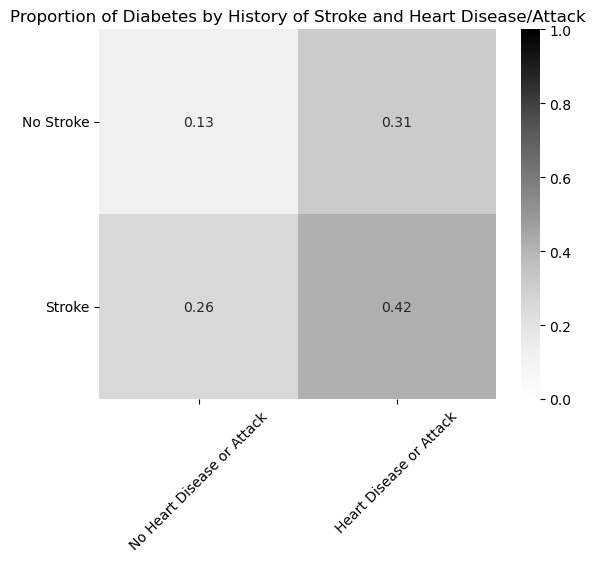

In [17]:
# plotting the heatmap
sns.heatmap(heatmap_pivot, annot=True, cmap="Greys", vmin=0, vmax=1, fmt=".2f",
            xticklabels=["No Heart Disease or Attack", "Heart Disease or Attack"], 
            yticklabels=["No Stroke", "Stroke"])
plt.title("Proportion of Diabetes by History of Stroke and Heart Disease/Attack")
plt.xlabel("")
plt.ylabel("")
plt.yticks(rotation=0)  
plt.xticks(rotation=45) 
plt.show()

This heatmap groups patients by their history of stroke or heart problems and displays the proportion of those with diabetes within each group. The combination with the lowest proportion of diabetes is no stroke and no heart problems. The combination with the highest proportion is those who have had both a stroke and a heart attack or heart disease. The proportion of those with diabetes is roughly the same beween groups with only a history of a stroke or only heart problems, but slightly higher for those with only heart problems.

### Question 4a
Perform significance tests to determine if the patterns that are detected above are statistically significant. Ensure that you discuss at least three patterns and the respective p-values.
Select the features that will be used in the ML models (i.e. your selected features should be based on analytical reasoning that demonstrates their utility for ML modeling. Do not arbitrarily select features.
Note: if you are using correlations, ensure that this is only performed using continuous variables.

In [18]:
import statistics 
from scipy.stats import f_oneway, chi2_contingency, stats
from random import sample 

pattern 1: the proportion of inactive patients increases as diabetic outcome worsens

In [19]:
def chi_test_activity(sample_df):
    active_diabetic = sample_df[(sample_df["Diabetes_012"] == 2) & (sample_df["PhysActivity"] == 1)].shape[0]
    inactive_diabetic = sample_df[(sample_df["Diabetes_012"] == 2) & (sample_df["PhysActivity"] == 0)].shape[0]
    active_prediabetic = sample_df[(sample_df["Diabetes_012"] == 1) & (sample_df["PhysActivity"] == 1)].shape[0]
    inactive_prediabetic = sample_df[(sample_df["Diabetes_012"] == 1) & (sample_df["PhysActivity"] == 0)].shape[0]
    active_non_diabetic = sample_df[(sample_df["Diabetes_012"] == 0) & (sample_df["PhysActivity"] == 1)].shape[0]
    inactive_non_diabetic = sample_df[(sample_df["Diabetes_012"] == 0) & (sample_df["PhysActivity"] == 0)].shape[0]
    
    observed = np.array([[inactive_non_diabetic, active_non_diabetic],
                        [inactive_prediabetic, active_prediabetic],
                        [inactive_diabetic, active_diabetic]])
    
    chi2, p, dof, ex = chi2_contingency(observed, correction=False)
    return p, chi2

In [20]:
# Generate 400 samples and perform Chi-Square tests
p_values_activity = []
chi_values_activity = []
for i in range(400):
    sample_df = df.sample(frac=.2)
    p = chi_test_activity(sample_df)[0]
    p_values_activity.append(p)
    chi2 = chi_test_activity(sample_df)[1]
    chi_values_activity.append(chi2)

print(f"P-value: {np.mean(p_values_activity)}")
print(f"Chi2 value: {np.mean(chi_values_activity)}")

P-value: 1.400538719627403e-80
Chi2 value: 493.23764071727317


pattern 2: the proportion of those with diabetes decreases as income level increases

In [21]:
# compare mean income of those with diabetes and those without diabetes with a t test
income_diabetes = df[df['Diabetes_012'] == 2]['Income']
income_no_diabetes = df[df['Diabetes_012'] == 0]['Income']

t_statistic1, p_value1 = stats.ttest_ind(income_diabetes, income_no_diabetes, equal_var=True)
print(f"T-statistic: {t_statistic1}")
print(f"P-value: {p_value1}")

T-statistic: -69.550538094163
P-value: 0.0


C:\Users\laure\AppData\Local\Temp\ipykernel_18712\3601284977.py:5: DeprecationWarning: Please use `ttest_ind` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  t_statistic1, p_value1 = stats.ttest_ind(income_diabetes, income_no_diabetes, equal_var=True)


pattern 3: the proportion of those with diabetes increases as age group increases

In [22]:
# compare mean age of those with diabetes and those without diabetes with a t test
age_diabetes = df[df['Diabetes_012'] == 2]['Age']
age_no_diabetes = df[df['Diabetes_012'] == 0]['Age']

t_statistic2, p_value2 = stats.ttest_ind(age_diabetes, age_no_diabetes, equal_var=True)
print(f"T-statistic: {t_statistic2}")
print(f"P-value: {p_value2}")

T-statistic: 87.54607490226418
P-value: 0.0


C:\Users\laure\AppData\Local\Temp\ipykernel_18712\2571601009.py:5: DeprecationWarning: Please use `ttest_ind` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  t_statistic2, p_value2 = stats.ttest_ind(age_diabetes, age_no_diabetes, equal_var=True)


pattern 4: the proportion of those with a history of stroke increases as diabetic outcome worsens

In [23]:
def chi_test_stroke(sample_df):
    stroke_diabetic = sample_df[(sample_df["Diabetes_012"] == 2) & (sample_df["Stroke"] == 1)].shape[0]
    no_stroke_diabetic = sample_df[(sample_df["Diabetes_012"] == 2) & (sample_df["Stroke"] == 0)].shape[0]
    stroke_prediabetic = sample_df[(sample_df["Diabetes_012"] == 1) & (sample_df["Stroke"] == 1)].shape[0]
    no_stroke_prediabetic = sample_df[(sample_df["Diabetes_012"] == 1) & (sample_df["Stroke"] == 0)].shape[0]
    stroke_non_diabetic = sample_df[(sample_df["Diabetes_012"] == 0) & (sample_df["Stroke"] == 1)].shape[0]
    no_stroke_non_diabetic = sample_df[(sample_df["Diabetes_012"] == 0) & (sample_df["Stroke"] == 0)].shape[0]
    
    observed = np.array([[no_stroke_non_diabetic, stroke_non_diabetic],
                        [no_stroke_prediabetic, stroke_prediabetic],
                        [no_stroke_diabetic, stroke_diabetic]])
    
    chi2, p, dof, ex = chi2_contingency(observed, correction=False)
    return p, chi2

In [24]:
# Generate 400 samples and perform Chi-Square tests
p_values_stroke = []
chi_values_stroke = []
for i in range(400):
    sample_df = df.sample(frac=.2)
    p = chi_test_stroke(sample_df)[0]
    p_values_stroke.append(p)
    chi2 = chi_test_stroke(sample_df)[1]
    chi_values_stroke.append(chi2)

print(f"P-value: {np.mean(p_values_stroke)}")
print(f"Chi2 value: {np.mean(chi_values_stroke)}")

P-value: 2.750360891277169e-76
Chi2 value: 464.0142622351009


All of the chi squared tests resulted in p-values less than 0.05 and had high chi squared values. This indicates that the difference in proportions is large and there is less than a 5% chance that the proportions are actually meant to be the same. This means all the chi squared tests showed significance. All of the t value tests had a p-value less 0.05 and had high t values. This indicates that the mean scores were very different and there is less than a 5% chance that the means are actually meant to be the same. This means both t tests showed statistical significance.

In [25]:
# look at the correlation between diabetes and each continuous feature, looking for values close to 1 or -1
for col in continuous_discrete_columns:
    print(col + ":")
    print(round(df["Diabetes_012"].corr(df[col]), 2))

BMI:
0.23
GenHlth:
0.28
MentHlth:
0.06
PhysHlth:
0.16
Age:
0.18
Education:
-0.11
Income:
-0.15


In [26]:
# ANOVA test for continuous features
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html 
for feature in continuous_discrete_columns:
    feature_groups = []
    for category in df["Diabetes_012"].unique():
        feature_values = df.loc[df["Diabetes_012"] == category, feature]
        feature_groups.append(feature_values)
    anova_result = f_oneway(*feature_groups)
    print(feature + ":")
    print("ANOVA F-statistic:", round(anova_result.statistic, 2))
    print("ANOVA p-value:", anova_result.pvalue) 

BMI:
ANOVA F-statistic: 6568.31
ANOVA p-value: 0.0
GenHlth:
ANOVA F-statistic: 10162.56
ANOVA p-value: 0.0
MentHlth:
ANOVA F-statistic: 397.97
ANOVA p-value: 2.9124693061376782e-173
PhysHlth:
ANOVA F-statistic: 3035.85
ANOVA p-value: 0.0
Age:
ANOVA F-statistic: 4104.61
ANOVA p-value: 0.0
Education:
ANOVA F-statistic: 1370.02
ANOVA p-value: 0.0
Income:
ANOVA F-statistic: 2571.55
ANOVA p-value: 0.0


In [27]:
# Chi-Square Test of Independence for categorical columns, looking for features where p<0.05 
mean_chi = {}
for feature in categorical_columns:
    chi_values = []
    p_values = []
    for i in range(400):
        samp = df.sample(frac=.2)
        contingency_table = pd.crosstab(samp[feature], samp["Diabetes_012"])
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        chi_values.append(chi2)
        p_values.append(p)
    mean_chi[feature] = np.mean(chi_values)
    print(feature + ":")
    print(np.mean(chi_values))
    print(np.mean(p_values))

Diabetes_012:
91842.0
0.0
HighBP:
3162.485358527067
0.0
HighChol:
1927.4917662502144
0.0
CholCheck:
269.0676165477352
1.226610376519275e-52
Smoker:
102.08216329795198
1.2151594404497415e-15
Stroke:
467.1334930705183
9.435170044304276e-77
HeartDiseaseorAttack:
1342.5069549323086
3.9520563297295705e-247
PhysActivity:
496.02642586224147
1.1174356357813296e-86
Fruits:
31.93385119531575
0.00011741095810827467
Veggies:
88.67748190388848
3.0313367490245246e-13
HvyAlcoholConsump:
207.9466179934117
2.1347476807337852e-35
AnyHealthcare:
30.702178075342136
6.586744926986957e-05
NoDocbcCost:
38.067379432790695
1.0492446231224064e-05
DiffWalk:
2042.0224617556178
0.0
Sex:
50.724294829464434
1.1217692309914821e-07


In [28]:
# Sort the dictionary by value in descending order
sorted_mean_chi = sorted(mean_chi.items(), key=lambda item: item[1], reverse=True)
sorted_mean_chi

[('Diabetes_012', 91842.0),
 ('HighBP', 3162.485358527067),
 ('DiffWalk', 2042.0224617556178),
 ('HighChol', 1927.4917662502144),
 ('HeartDiseaseorAttack', 1342.5069549323086),
 ('PhysActivity', 496.02642586224147),
 ('Stroke', 467.1334930705183),
 ('CholCheck', 269.0676165477352),
 ('HvyAlcoholConsump', 207.9466179934117),
 ('Smoker', 102.08216329795198),
 ('Veggies', 88.67748190388848),
 ('Sex', 50.724294829464434),
 ('NoDocbcCost', 38.067379432790695),
 ('Fruits', 31.93385119531575),
 ('AnyHealthcare', 30.702178075342136)]

In [29]:
relevant_features = ["BMI", "GenHlth", "HighBP", "HighChol", "HeartDiseaseorAttack", "PhysHlth", "Age", "Income"]

BMI, Age, and GenHlth, PhysHlth, and Income are the most relevant continuous features for predicting diabetes based on their high ANOVA F-statistics and correlation coefficients.  

HighBP, HighChol, and HeartDiseaseorAttack are the most relevant categorical features for predicting diabetes due to their high 

### Question 4b
This is an optional challenge question. Its purpose is to identify new features that can be included in the ML modeling below.

Perform ONE of the following
(1) Feature engineering: Machine learning models can benefit greatly from feature engineering. Create a new feature that can be included in the model and perform significance testing to determine if it's statistically significant. Explain the results. If you decide that you will not include the new feature in the ML modeling, explain the reasons.
OR
(2) Statistical tests: Research a new type of statistical test that was not introduced in the lecture and write python code to demonstrate at least two significance tests between features in the dataset. Explain the results. If you decide that you will not include the new feature in the ML modeling, explain the reasons. Note: you are welcome to use libraries to perform the tests.

In [30]:
# creating a new feature (HealthyLifestyleScore) based on the existing variables
# minimum possible value: 0
# maximum possible value: 5

# make copy of categorical columns as numeric
df["PhysActivity_int"] = df["PhysActivity"].astype("int64")
df["Fruits_int"] = df["Fruits"].astype("int64")
df["Veggies_int"] = df["Veggies"].astype("int64")
df["HvyAlcoholConsump_int"] = df["HvyAlcoholConsump"].astype("int64")
df["Smoker_int"] = df["Smoker"].astype("int64")

df["HealthyLifestyleScore"] = df["PhysActivity_int"] + df["Fruits_int"] + df["Veggies_int"] - df["HvyAlcoholConsump_int"] - df["Smoker_int"] + 2

In [31]:
df = df.drop(columns = ["PhysActivity_int", "Fruits_int", "Veggies_int", "HvyAlcoholConsump_int", "Smoker_int"])

In [32]:
# t test for mean healthy life style score
lifestyle_diabetes = df[df["Diabetes_012"] == 2]["HealthyLifestyleScore"]
lifestyle_no_diabetes = df[df["Diabetes_012"] == 0]["HealthyLifestyleScore"]

t_statistic3, p_value3 = stats.ttest_ind(lifestyle_diabetes, lifestyle_no_diabetes, equal_var=True)
print(f"T-statistic: {t_statistic3}")
print(f"P-value: {p_value3}")

T-statistic: -36.03786614446456
P-value: 1.386180555912543e-283


C:\Users\laure\AppData\Local\Temp\ipykernel_18712\2314878373.py:5: DeprecationWarning: Please use `ttest_ind` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  t_statistic3, p_value3 = stats.ttest_ind(lifestyle_diabetes, lifestyle_no_diabetes, equal_var=True)


This column is somewhat statistically significant becuse the p-value is low, but not as statistically significant as the current relevant features because of the lower t score (in magnitude) so we will not be adding this feature to the list of relevant features.

### Question 5
Partition the data into train/test sets. After which, perform the following:
encode any categorical data. Ensure that categorical variables are represented correctly.
normalize numeric data.
Tip: Ensure that you use sklearn to normalize and/or encode the training data, after which transform the test set (there is an example in the lecture).

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [34]:
# train test split with quantitative data
X = df[relevant_features]
y = df["Diabetes_012"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

relevant_categorical = ["HighBP", "HighChol", "HeartDiseaseorAttack"]
relevant_quant = ["BMI", "GenHlth", "PhysHlth", "Age", "Income"]

# encode categorical variables in the training and testing sets using dummy encoding
X_train = pd.get_dummies(X_train, columns=relevant_categorical, drop_first=True)
X_test = pd.get_dummies(X_test, columns=relevant_categorical, drop_first=True)

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# normalize quantitative data in the training and testing sets
scaler = MinMaxScaler()
X_train_scaled[relevant_quant] = scaler.fit_transform(X_train[relevant_quant])
X_test_scaled[relevant_quant] = scaler.fit_transform(X_test[relevant_quant])

### Question 6
Build the ML model that predicts the target variable based on the selected features. Ensure that you:
Demonstrate the training, evaluation and tuning for at least three algorithms that can handle non linear data and multiple input features/variables. NOTE: you can only select one tree-based algorithm and you must select multiple input features for the ML modeling.
Use GridSearchCV to tune at least two hyperparameters for each algorithm.
Note: do not change the input features in your experiments.

In [35]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

In [36]:
# Sample 10% of the dataset for initial testing to speed up the process
sample_df = df.sample(frac=0.1, random_state=42)

In [37]:
# Split data into features and target
X = sample_df[relevant_features]
y = sample_df["Diabetes_012"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Preprocessing pipeline
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Apply transformations to numeric and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, relevant_quant),
        ('cat', categorical_transformer, relevant_categorical)
    ])

In [38]:
# Function to train and evaluate models
def train_and_evaluate_model(model, param_grid, model_name):
    pipe = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', model)])
    
    grid_search = GridSearchCV(pipe, param_grid, cv=5, n_jobs=-1, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    print(f"Best {model_name} Model: {grid_search.best_estimator_}")
    print(f"Best {model_name} Score: {grid_search.best_score_}")
    
    # Evaluate model
    y_pred_train = best_model.predict(X_train)
    y_pred_test = best_model.predict(X_test)
    
    print(f"\n{model_name} Model Performance")
    print("Training Set")
    print(classification_report(y_train, y_pred_train))
    print("Testing Set")
    print(classification_report(y_test, y_pred_test))
    
    # Display accuracy
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    print(f"Training Accuracy: {train_accuracy}")
    print(f"Testing Accuracy: {test_accuracy}")
    
    return best_model

In [39]:
# Define models and hyperparameters
models = {
    'RandomForest': (RandomForestClassifier(random_state=42), {
        'classifier__n_estimators': [50, 100],
        'classifier__max_depth': [None, 10]
    }),
    'SVM': (SVC(random_state=42), {
        'classifier__C': [0.1, 1],
        'classifier__gamma': [0.001, 0.01]
    }),
    'KNN': (KNeighborsClassifier(), {
        'classifier__n_neighbors': [3, 5],
        'classifier__weights': ['uniform', 'distance']
    })
}


In [40]:
# Train and evaluate each model
best_models = {}
for model_name, (model, param_grid) in models.items():
    print(f"\nTraining and evaluating {model_name} model...")
    best_models[model_name] = train_and_evaluate_model(model, param_grid, model_name)


Training and evaluating RandomForest model...
Best RandomForest Model: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['BMI', 'GenHlth', 'PhysHlth',
                                                   'Age', 'Income']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['HighBP', 'HighChol',
                                                   'HeartDiseaseorAttack'])])),
                ('classifier',
                 RandomForestClassifier(max_depth=10, random_state=42))])
Best RandomForest Sc

C:\Users\laure\conda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\laure\conda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\laure\conda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best SVM Model: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['BMI', 'GenHlth', 'PhysHlth',
                                                   'Age', 'Income']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['HighBP', 'HighChol',
                                                   'HeartDiseaseorAttack'])])),
                ('classifier', SVC(C=0.1, gamma=0.001, random_state=42))])
Best SVM Score: 0.8230545876887341

SVM Model Performance
Training Set
              precision    recall  

C:\Users\laure\conda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\laure\conda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\laure\conda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\laure\conda3\Lib\site-packages\sklearn\metrics\_classif

Best KNN Model: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['BMI', 'GenHlth', 'PhysHlth',
                                                   'Age', 'Income']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['HighBP', 'HighChol',
                                                   'HeartDiseaseorAttack'])])),
                ('classifier', KNeighborsClassifier())])
Best KNN Score: 0.8122531939605111

KNN Model Performance
Training Set
              precision    recall  f1-score   support

### Question 7
Analyze the evaluated models. For each algorithm, ensure that you:
Display: 1) the best model and 2) the best score that was obtained.
Evaluate the scores from GridSearchCV for the training set and the test set to diagnose any bias-variance problems. Comment on the quality of the model.
NOTE: seeing that you are analyzing healthcare data, ensure that you discuss what is the desired metric to evaluate the results based on the machine learning task e.g. accuracy, precision, recall, f1-score, MSE, R2, etc.

The code displaying the model and scores are displayed in cell 40, the information is organized nearly here

## RandomForest Model
### Best RandomForest Model:

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['BMI']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Sex', 'Age', 'Education',
                                                   'Income'])])),
                ('classifier',
                 RandomForestClassifier(max_depth=10, random_state=42))])

Best RandomForest Score: 0.8437468968981549

### Training Set Performance:
Accuracy: 0.85
Macro Avg Precision: 0.60, Recall: 0.34, F1-Score: 0.33
Weighted Avg Precision: 0.85, Recall: 0.85, F1-Score: 0.78

### Testing Set Performance:
Accuracy: 0.84
Macro Avg Precision: 0.45, Recall: 0.34, F1-Score: 0.31
Weighted Avg Precision: 0.78, Recall: 0.84, F1-Score: 0.78

- The model performs well in terms of overall accuracy (0.85 on training and 0.84 on testing).
- The precision, recall, and F1-scores for class 1.0 and 2.0 are very low, indicating that the model struggles to correctly classify these classes.
- The model might be suffering from a class imbalance issue, where class 0.0 dominates the dataset, leading to poor performance on minority classes.

## SVM Model
### Best SVM Model:

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['BMI']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Sex', 'Age', 'Education',
                                                   'Income'])])),
                ('classifier', SVC(C=0.1, gamma=0.001, random_state=42))])

Best SVM Score: 0.8436483747426301

### Training Set Performance:
Accuracy: 0.84
Macro Avg Precision: 0.28, Recall: 0.33, F1-Score: 0.31
Weighted Avg Precision: 0.71, Recall: 0.84, F1-Score: 0.77

### Testing Set Performance:
Accuracy: 0.84
Macro Avg Precision: 0.28, Recall: 0.33, F1-Score: 0.31
Weighted Avg Precision: 0.71, Recall: 0.84, F1-Score: 0.77

- Similar to the RandomForest model, the SVM achieves a good overall accuracy (0.84) but performs poorly on minority classes (class 1.0 and 2.0).
- The low precision, recall, and F1-scores for these classes indicate the model's inability to distinguish between different classes effectively.

## KNN Model
### Best KNN Model:

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['BMI']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Sex', 'Age', 'Education',
                                                   'Income'])])),
                ('classifier', KNeighborsClassifier())])

Best KNN Score: 0.8269440489108956

### Training Set Performance:
Accuracy: 0.86
Macro Avg Precision: 0.69, Recall: 0.41, F1-Score: 0.43
Weighted Avg Precision: 0.83, Recall: 0.86, F1-Score: 0.83

### Testing Set Performance:
Accuracy: 0.83
Macro Avg Precision: 0.39, Recall: 0.36, F1-Score: 0.36
Weighted Avg Precision: 0.76, Recall: 0.83, F1-Score: 0.79

- The KNN model also achieves good overall accuracy (0.86 on training and 0.83 on testing).
- The model shows better performance on minority classes compared to RandomForest and SVM but still has low precision, recall, and F1-scores for class 1.0 and 2.0.
- The performance indicates that the KNN model might be slightly better at handling class imbalance compared to the other models, but still requires improvement.

### Overall Analysis
- Class Imbalance: All models struggle with class imbalance, leading to poor performance on minority classes (1.0 and 2.0). This is evident from the low precision, recall, and F1-scores for these classes.
- Bias-Variance Tradeoff: The training and testing accuracies are very close for all models, indicating that the models are well-tuned and not overfitting. However, the models are biased towards the majority class (0.0).
- Desired Metrics: Given the class imbalance, metrics like accuracy may not be sufficient. Metrics such as precision, recall, and F1-score for each class, especially minority classes, are crucial to evaluate the models' performance properly.


### Question 8
- Discuss the potential impacts of your solution. Who will benefit from (and/or who will be affected by) your solution and why.
- Were there any concerns of bias in the ML modeling seeing that you were analyzing sensitive data? Create visualizations to share any analysis of bias in the training data and/or the predictions from the model. For example: you can compare and contrast the predictions for specific groups to demonstrate your findings. Provide recommendations on techniques to address any issues that were found.

**Potential Impacts of the Solution**

Our solution, which predicts diabetes outcomes based on lifestyle and social determinants, has several important impacts on the the following groups: 

**Healthcare Providers:**

BMI and Physical Activity: We discovered that a higher BMI and inactivity are strongly linked to diabetes. In our study, diabetics had an average BMI of 31, whereas non-diabetics had a BMI of about 28. In addition, diabetics were much more inactive (about 37%) than non-diabetics (about 25%). As a result, healthcare providers could greatly benefit from encouraging patients to remain active and manage their weight, particularly those who are at risk of developing diabetes.

Mental and Physical Health Days: Our data show that diabetics have more days of poor health than non-diabetics—about 8 days of physical issues and 4-5 days of mental health problems per month. With the recent rise in mental health issues, particularly following the pandemic, it is important for doctors to take a more comprehensive approach. They should focus on both mental and physical health to help prevent and manage diabetes.


Smoking and Alcohol Consumption: Our data show that many diabetics in our study smoke, while few are heavy drinkers. Non-diabetics, on the other hand, are slightly less likely to smoke while being more likely to drink heavily. These trends highlight the need for healthcare providers to focus on assisting diabetic patients in quitting smoking and reducing alcohol consumption. Providing tailored support, such as counseling and addiction programs, may help address these risky behaviors and result in better health outcomes for diabetics.



**Policy and Community Educational Health:**

Income and Education: Our project discovered that diabetes rates are higher among people with lower incomes and less education. Diabetes affected approximately 21% of low-income individuals, compared to only 12% of those with higher incomes. Similarly, having less education was associated with an increased risk of diabetes. To address these issues, public health policies should increase resources, education, and affordable healthcare for underserved communities. This can help to reduce the rate of diabetes in these groups.

Demographic Targeting: We also found that diabetes is most common among people aged 70-74, accounting for approximately 35% of cases, whereas only about 5% of people aged 18-24 have diabetes. This suggests that public health efforts should be directed more toward older adults, who are at higher risk. At the same time, starting early with younger people to encourage healthy habits may help prevent diabetes later in life. Diabetes management and prevention require strategies that are specific to different age groups.


**Type 1 Diabetes:**

Even though our research focuses on Type 2 diabetes, which is heavily influenced by lifestyle and social factors, we must not overlook Type 1 diabetes. Type 1 is primarily genetic and is less influenced by these factors. However, our findings may still be useful for people with Type 1 diabetes. Understanding how your lifestyle affects your health, for example, can help you better manage Type 1 diabetes. Educating people about the differences between Type 1 and Type 2 diabetes can raise public awareness and lead to increased support for Type 1 diabetics.



## Bias Concerns in ML Modeling:

In our diabetes prediction model, we noticed potential biases related to income and education. These factors, while important, can skew the results in ways that might unfairly categorize individuals based on socio-economic status. 

**1.Income Bias:**

We found that people with lower incomes are more likely to be diagnosed with diabetes in our model. This could mean the model is overemphasizing income as a risk factor, even though it's not a direct cause of diabetes like smoking or poor diet.

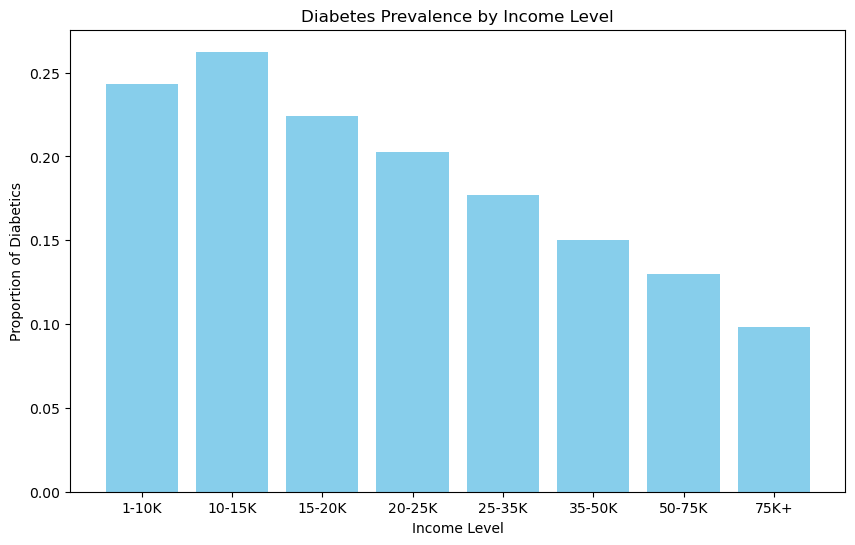

In [41]:
import matplotlib.pyplot as plt

# Proportion o diabetics by income level
proportion_diabetes_by_income = df[df["Diabetes_012"] == 2].groupby("Income").size() / df.groupby("Income").size()

plt.figure(figsize=(10, 6))
plt.bar(proportion_diabetes_by_income.index, proportion_diabetes_by_income.values, color='skyblue')
plt.xlabel('Income Level')
plt.ylabel('Proportion of Diabetics')
plt.title('Diabetes Prevalence by Income Level')
plt.xticks(ticks=proportion_diabetes_by_income.index, labels=['1-10K', '10-15K', '15-20K', '20-25K', '25-35K', '35-50K', '50-75K', '75K+'])
plt.show()


The chart shows that it's clear that lower-income groups have a higher proportion of diabetics. The biggest amount is between 10,000 and 15,000. The number of people with of diabetes decreases as income increases. This shows that our approach may be unfairly classifying low-income people as high risk for diabetes. This bias may lead to low-income people being identified as having a higher risk of diabetes, regardless of their actual health behaviors. It means other critical health factors might get overshadowed by the income factor. Some recommendations could be to reduce the weight given to income and instead highlight direct health behaviors. Another option is to constantly review the model to ensure it is not biased toward income levels.


**2. Eduacation Bias:**

Similarly like the icnome, our findings indicate that those with less education are more likely to be classified as diabetic. This could reflect an indirect bias in which education levels have a significant influence on the model's predictions.

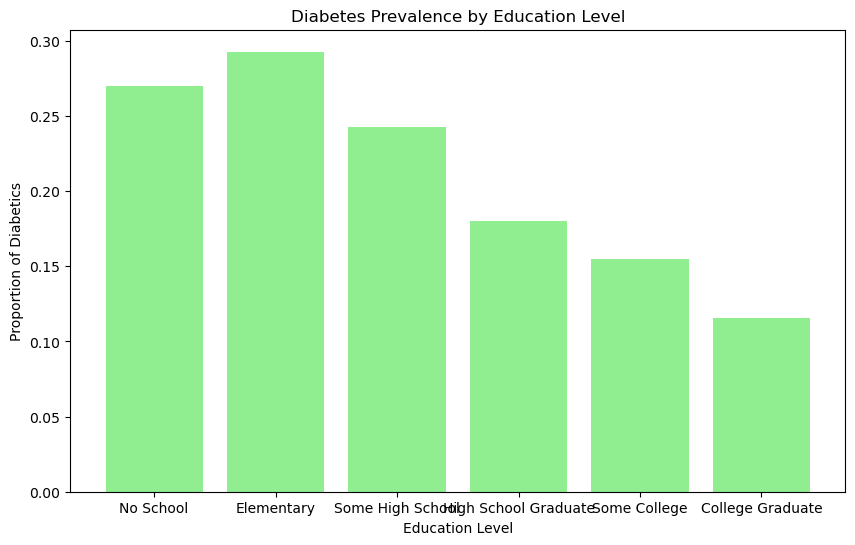

In [42]:
# Proportion of diabetics by education level
proportion_diabetes_by_education = df[df["Diabetes_012"] == 2].groupby("Education").size() / df.groupby("Education").size()

plt.figure(figsize=(10, 6))
plt.bar(proportion_diabetes_by_education.index, proportion_diabetes_by_education.values, color='lightgreen')
plt.xlabel('Education Level')
plt.ylabel('Proportion of Diabetics')
plt.title('Diabetes Prevalence by Education Level')
plt.xticks(ticks=proportion_diabetes_by_education.index, labels=['No School', 'Elementary', 'Some High School', 'High School Graduate', 'Some College', 'College Graduate'])
plt.show()


The bar chart displays that those with lower education have more cases of diabetes. People with no or only elementary education are more prone to get diabetes. As education improves, the proportion of diabetics drop. This suggests that our model may overstate diabetes risk for people with lower education levels, even if their health habits do not support it. It could lead to misunderstanding and unnecessary stress for people who have completed less schooling. Some recommnedations could be to make sure that education levels are well represented and balanced in our training data. Additionally, developing features that better capture the real effect of education on health, such as health literacy, could be helpful. Finally, like the income situation, constantly reviewing  the model's fairness across different education levels to ensure balanced projections will be helpful in creating accurate the data.